In [1]:
from collections import defaultdict
from statistics import mean, stdev

from matplotlib import pyplot as plt
from torchrs.datasets import RSICD

from src.data.vocab import Vocab
from src.paths import DATASET_DIR

In [2]:
def summary(dataset: RSICD, vocab: Vocab, _train_vocab: Vocab) -> None:
    captions_per_image = []
    words_per_caption = []
    image_sizes = []

    token_frequencies = defaultdict(int)

    for i in range(len(dataset)):
        sample = dataset[i]
        image = sample["x"]
        captions = sample["captions"]
        captions_per_image.append(len(captions))
        words_per_caption.extend(len(caption.split()) for caption in captions)
        image_sizes.append((image.size(0), image.size(1), image.size(2)))

        for caption in captions:
            for token in caption.split():
                token_frequencies[token] += 1

    token_frequencies = dict(sorted(token_frequencies.items(), key=lambda item: item[1], reverse=True))

    print("Number of images:", len(dataset))
    print("Unique image sizes:", set(image_sizes))
    print("All images have same number of captions:", len(set(captions_per_image)) == 1)
    print("Number of captions per image:", mean(captions_per_image))
    print("Number of captions:", sum(captions_per_image))
    print("Max words per caption:", max(words_per_caption))
    print("Min words per caption:", min(words_per_caption))
    print(f"Mean words per caption: {mean(words_per_caption):.3f}")
    print(f"STD words per caption: {stdev(words_per_caption):.3f}")
    print("Total number of words:", sum(words_per_caption))
    print("Number of tokens:", len(vocab))
    print("Number of tokens (frequency >= 10000):", sum(freq >= 10000 for freq in token_frequencies.values()))
    print("Number of tokens (frequency >= 1000):", sum(freq >= 1000 for freq in token_frequencies.values()))
    print("Number of tokens (frequency >= 100):", sum(freq >= 100 for freq in token_frequencies.values()))
    print("Number of tokens (frequency >= 10):", sum(freq >= 10 for freq in token_frequencies.values()))
    print("Number of tokens (frequency < 10):", sum(freq < 10 for freq in token_frequencies.values()))
    print("Number of tokens that are not present in the training data:",
          sum(token not in _train_vocab.token_to_id for token in vocab.token_to_id.keys()))

    top_k = 10
    print(f"Top {top_k} most frequent tokens:")
    for i, (token, freq) in enumerate(token_frequencies.items()):
        if i >= top_k:
            break
        print(f"\t{token}: {freq}")

    plt.hist(words_per_caption, bins=range(min(words_per_caption), max(words_per_caption) + 1), edgecolor="black")
    plt.title("Distribution of Words Per Caption")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()

In [3]:
train_dataset = RSICD(DATASET_DIR, split="train")
val_dataset = RSICD(DATASET_DIR, split="val")
test_dataset = RSICD(DATASET_DIR, split="test")

train_vocab = Vocab.init_from_data(train_dataset)
val_vocab = Vocab.init_from_data(val_dataset)
test_vocab = Vocab.init_from_data(test_dataset)

Number of images: 8734
Unique image sizes: {(3, 224, 224)}
All images have same number of captions: True
Number of captions per image: 5
Number of captions: 43670
Max words per caption: 35
Min words per caption: 1
Mean words per caption: 11.636
STD words per caption: 3.075
Total number of words: 508127
Number of tokens: 2606
Number of tokens (frequency >= 10000): 14
Number of tokens (frequency >= 1000): 75
Number of tokens (frequency >= 100): 249
Number of tokens (frequency >= 10): 802
Number of tokens (frequency < 10): 1800
Number of tokens that are not present in the training data: 0
Top 10 most frequent tokens:
	.: 43670
	a: 41732
	are: 25698
	green: 21088
	many: 18872
	in: 17510
	trees: 17268
	and: 16626
	of: 15084
	the: 14157


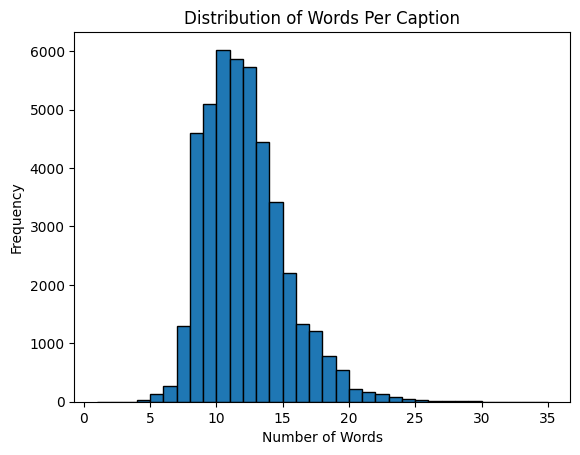

In [4]:
summary(train_dataset, train_vocab, train_vocab)

Number of images: 1094
Unique image sizes: {(3, 224, 224)}
All images have same number of captions: True
Number of captions per image: 5
Number of captions: 5470
Max words per caption: 27
Min words per caption: 1
Mean words per caption: 9.937
STD words per caption: 2.922
Total number of words: 54356
Number of tokens: 1171
Number of tokens (frequency >= 10000): 0
Number of tokens (frequency >= 1000): 12
Number of tokens (frequency >= 100): 83
Number of tokens (frequency >= 10): 263
Number of tokens (frequency < 10): 904
Number of tokens that are not present in the training data: 310
Top 10 most frequent tokens:
	.: 5469
	a: 4226
	are: 2763
	green: 2308
	the: 2071
	many: 1926
	in: 1895
	trees: 1640
	of: 1552
	is: 1521


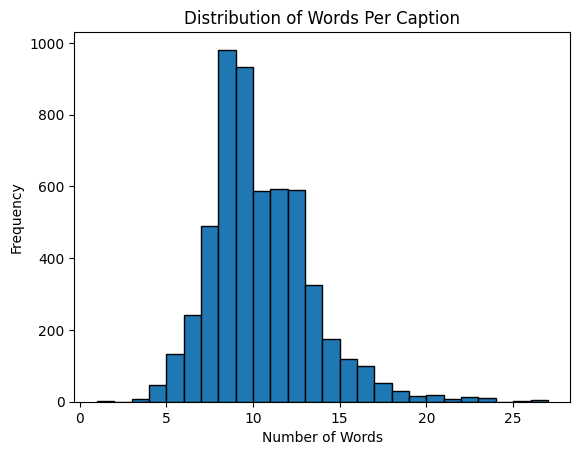

In [5]:
summary(val_dataset, val_vocab, train_vocab)

Number of images: 1093
Unique image sizes: {(3, 224, 224)}
All images have same number of captions: True
Number of captions per image: 5
Number of captions: 5465
Max words per caption: 33
Min words per caption: 6
Mean words per caption: 12.368
STD words per caption: 3.697
Total number of words: 67593
Number of tokens: 1565
Number of tokens (frequency >= 10000): 0
Number of tokens (frequency >= 1000): 11
Number of tokens (frequency >= 100): 113
Number of tokens (frequency >= 10): 454
Number of tokens (frequency < 10): 1107
Number of tokens that are not present in the training data: 433
Top 10 most frequent tokens:
	.: 5465
	the: 4386
	a: 4271
	is: 2505
	of: 1922
	are: 1721
	with: 1528
	and: 1522
	in: 1389
	there: 1159


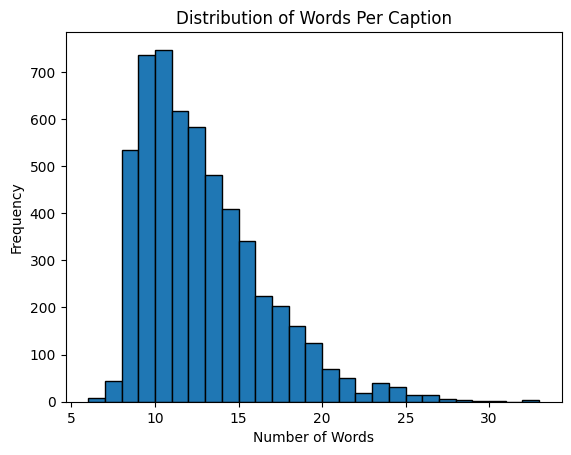

In [6]:
summary(test_dataset, test_vocab, train_vocab)